# COMCAST PROJECT

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from path import Path
%matplotlib inline

## 1. Import data into Python environment

In [2]:
# loading dataset into a pandas data frame using read_csv available with pandas

file_path = Path("Comcast_telecom_complaints_data.csv")

df = pd.read_csv(file_path)

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

## 2. Trend chart for the number of complaints at monthly and daily granularity levels

C:\Users\Shrisha Hegde\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


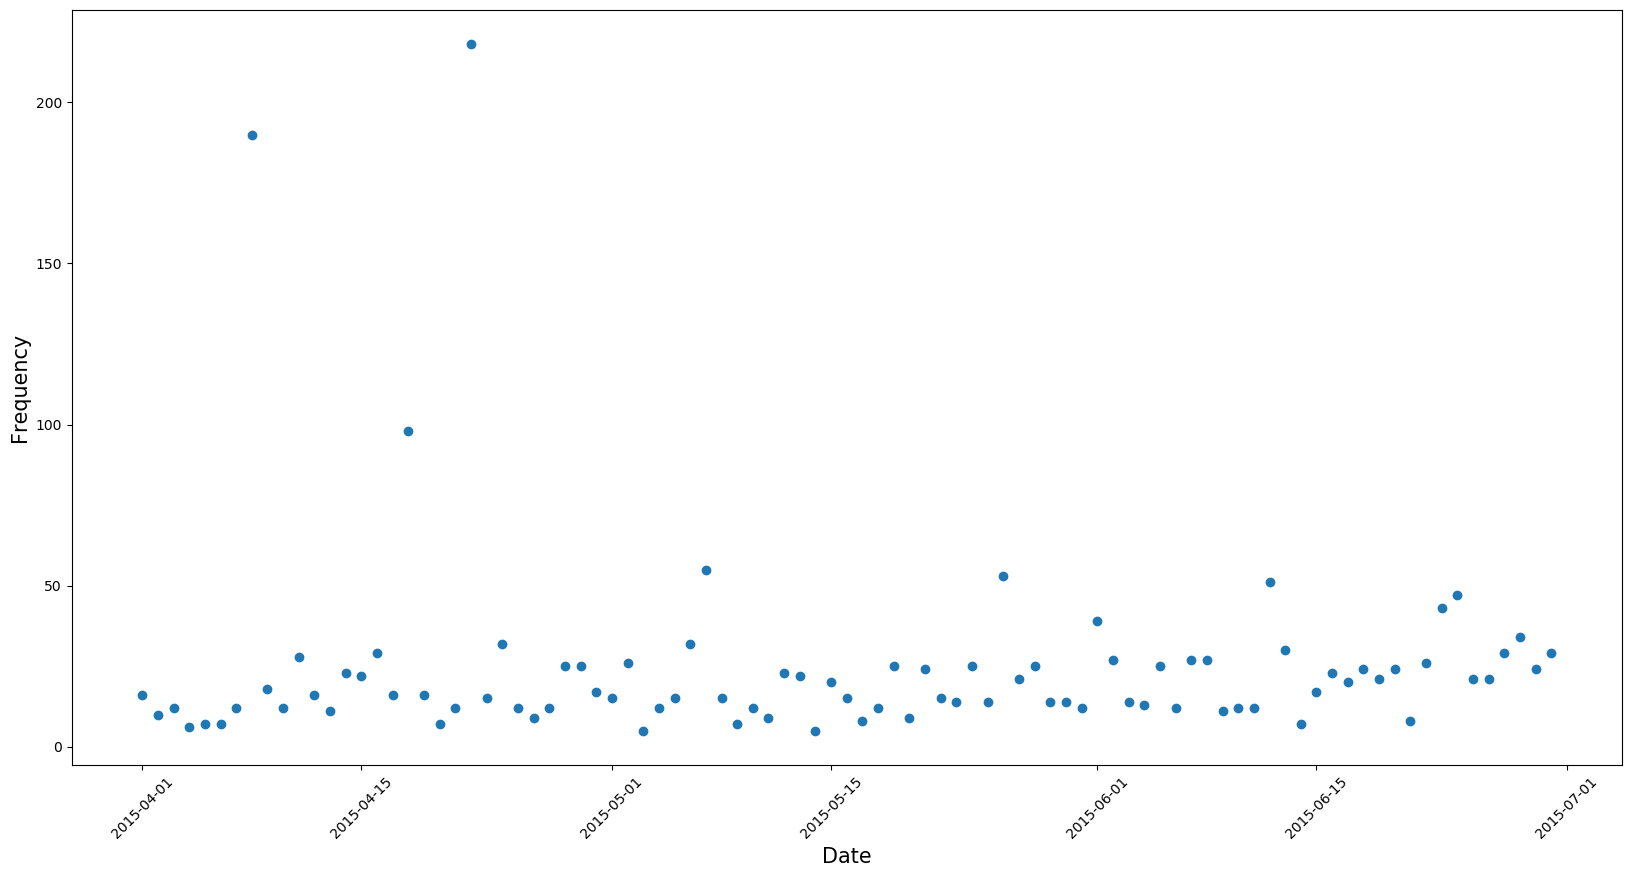

In [5]:
dates = plt.dates.date2num(pd.to_datetime(df.Date).unique())
plt.pyplot.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
plt.pyplot.xlabel("Date", fontsize = 15)
plt.pyplot.ylabel("Frequency", fontsize = 15)
plt.pyplot.xticks(rotation = 45)
plt.pyplot.rc('xtick', labelsize = 15)
plt.pyplot.rc('ytick', labelsize = 15)
plt.pyplot.style.use('ggplot')
plt.pyplot.plot_date(dates, df.Date.value_counts())

In [6]:
df['Combined'] = pd.to_datetime(df["Date"]).apply(lambda x: x.strftime('%Y-%m'))

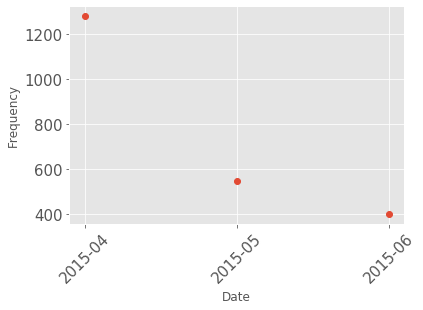

In [7]:
#plt.pyplot.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
plt.pyplot.xlabel("Date")
plt.pyplot.ylabel("Frequency")
plt.pyplot.xticks(rotation = 45)
#plt.pyplot.rc('xtick', labelsize = 15)
#plt.pyplot.rc('ytick', labelsize = 15)
plt.pyplot.style.use('ggplot')
plt.pyplot.plot_date(df.Combined.unique(), df.Combined.value_counts())

## 3. Which complaint types are maximum

In [8]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [9]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalised

In [36]:
doc_complete = df['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [11]:
import gensim
from gensim import corpora

In [30]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [31]:
from gensim.models import LdaModel

In [32]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics = NUM_TOPICS, id2word = dictionary, passes = 30)

In [33]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.068*"bill" + 0.046*"false" + 0.046*"comcast" + 0.028*"price" + 0.027*"switch" + 0.025*"credit" + 0.023*"monthly" + 0.021*"advertising" + 0.021*"service" + 0.020*"deceptive"')

(1, '0.155*"service" + 0.079*"comcast" + 0.068*"issue" + 0.049*"billing" + 0.036*"customer" + 0.027*"poor" + 0.019*"day" + 0.013*"failure" + 0.012*"connectivity" + 0.010*"billed"')

(2, '0.235*"comcast" + 0.181*"internet" + 0.114*"service" + 0.048*"complaint" + 0.014*"high" + 0.011*"business" + 0.011*"outage" + 0.011*"monopoly" + 0.010*"customer" + 0.009*"price"')

(3, '0.049*"fee" + 0.045*"connection" + 0.041*"pay" + 0.038*"charged" + 0.023*"time" + 0.023*"sale" + 0.021*"back" + 0.020*"lied" + 0.020*"loss" + 0.017*"access"')

(4, '0.137*"comcast" + 0.117*"charge" + 0.057*"service" + 0.035*"problem" + 0.028*"billing" + 0.026*"fraudulent" + 0.026*"overage" + 0.024*"account" + 0.019*"month" + 0.018*"refund"')

(5, '0.198*"data" + 0.160*"cap" + 0.153*"comcast" + 0.038*"usage" + 0.033*"pricing" + 0.016*"limit"

In [34]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic #" + "{}".format(i+1)] = [i[0] for i in words] 

In [35]:
pd.DataFrame(word_dict)

,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7,Topic #8,Topic #9
0,bill,service,comcast,fee,comcast,data,speed,comcast,cable
1,false,comcast,internet,connection,charge,cap,internet,xfinity,comcast
2,comcast,issue,service,pay,service,comcast,billing,contract,bill
3,price,billing,complaint,charged,problem,usage,comcast,help,without
4,switch,customer,high,time,billing,pricing,practice,payment,monopolistic
5,credit,poor,business,sale,fraudulent,limit,slow,please,lack
6,monthly,day,outage,back,overage,unfair,throttling,12,charging
7,advertising,failure,monopoly,lied,account,xfinity,unfair,plan,cramming
8,service,connectivity,customer,loss,month,300gb,comcastxfinity,modem,incorrect
9,deceptive,billed,price,access,refund,regarding,paying,ps4,intermittent


In [19]:
import pyLDAvis.gensim

C:\Users\Shrisha Hegde\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [27]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=True)
pyLDAvis.display(Lda_display)

C:\Users\Shrisha Hegde\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Explaination

The dataset is divided into 9 complaint types. Over all the mostly used words are 'Comcast', 'Internet', 'Service', 'Data', 'Billing', 'Cap', 'Speed' etc... So from these words we get a rough idea that customers are complaining about The poor internet, Bad customer service, Improper billing, Less or High internet FUP, The Speed of the internet is not as promised.
- Topic #1 could mostly be Internet speed throttling.
- Topic #2 is mostly about unfair charges.
- Topic #3 looks at illegal practices.
- Topic #4 is about bad customer service.
- Topic #5 is about xfinity.

Other 4 are fairy similar to the once mentioned above.

## 5.  Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [21]:
df.loc[df['Status'] == 'Pending', 'Status'] = 'Open'
df.loc[df['Status'] == 'Solved', 'Status'] = 'Closed'

## 6. State wise status of complaints in a stacked bar chart

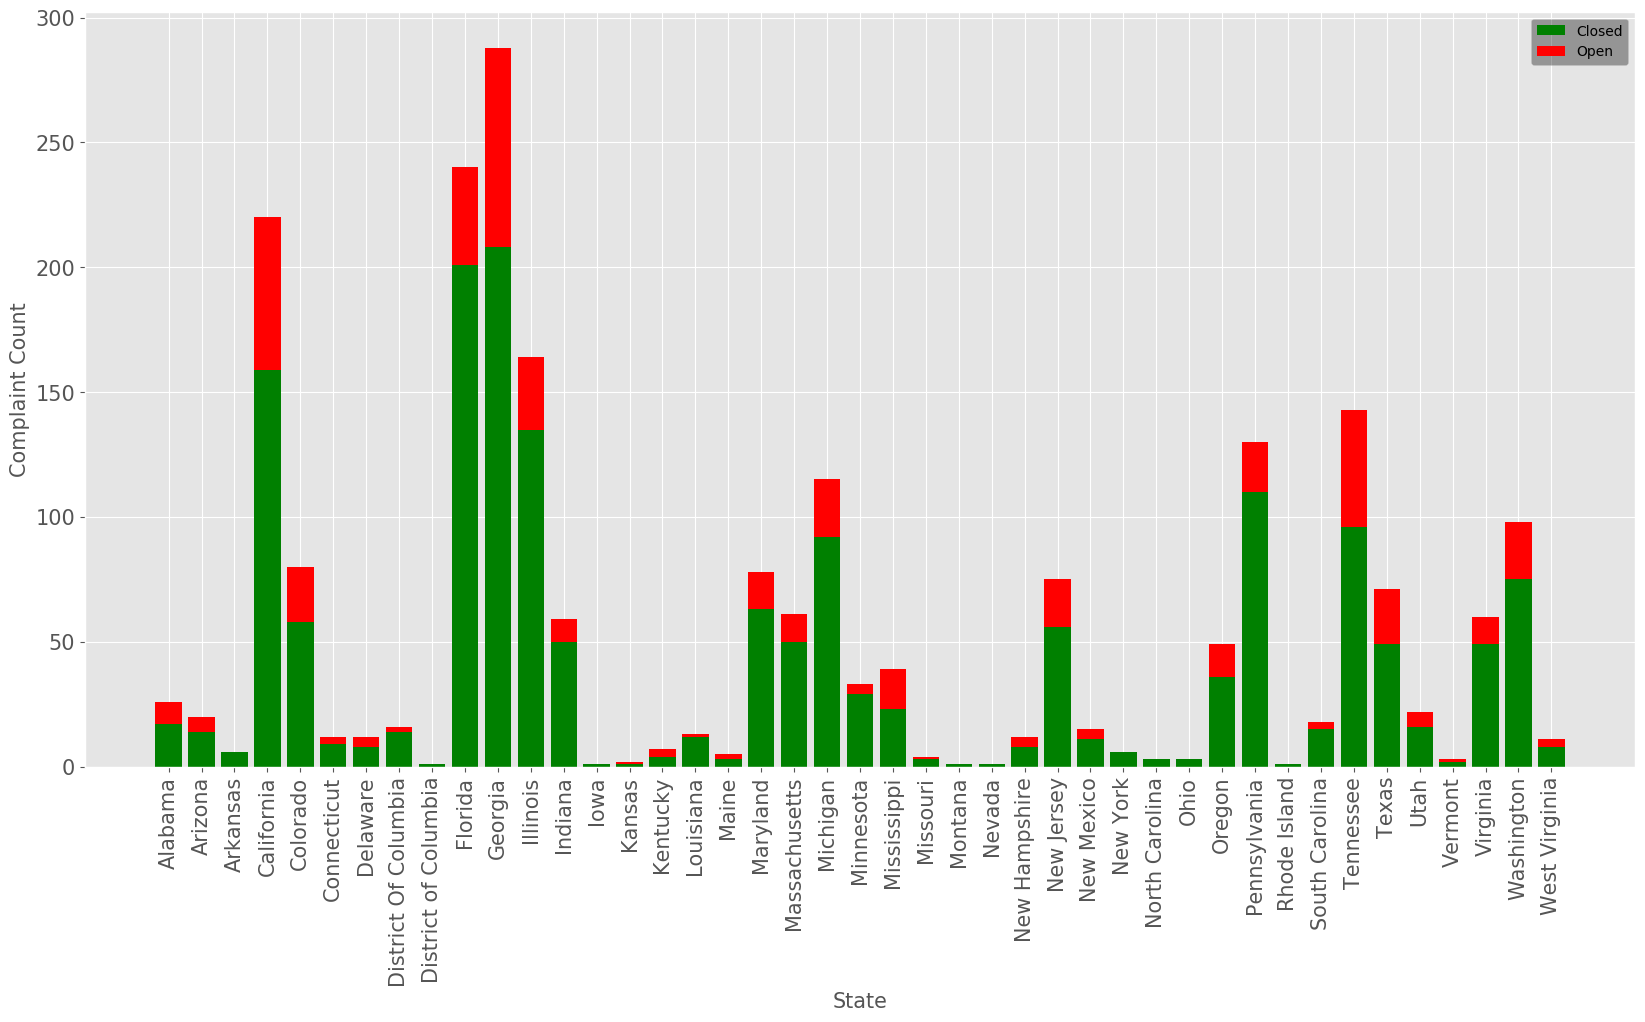

In [23]:
df_percent = df.groupby(['State', 'Status']).size()
Closed = []
Open = []
for State in df_percent.index.get_level_values(0):
    Closed.append(df_percent[State]['Closed'])
    try:
        df_percent[State]['Open']
    except:
        Open.append(0)
    else:
        Open.append(df_percent[State]['Open'])
plt.pyplot.figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
plt.pyplot.bar(list(df_percent.index.get_level_values(0)), Closed, label = 'Closed', color = 'g')
plt.pyplot.xticks(rotation = 90)
plt.pyplot.bar(list(df_percent.index.get_level_values(0)), Open, bottom = Closed, label = 'Open', color = 'r')
plt.pyplot.xlabel('State', fontsize = 15)
plt.pyplot.ylabel('Complaint Count', fontsize = 15)
plt.pyplot.legend(facecolor = 'k', framealpha = 0.35)
plt.pyplot.show()

## 7. State with the maximum complaints

In [24]:
df_state = df.groupby(['State']).size().sort_values(ascending = False).to_frame().reset_index().rename({0:'Count'}, axis = 1)
print(df_state.iloc[0])

State    Georgia
Count        288
Name: 0, dtype: object


Georgia has the highest number of complaints. The count being 288.

## 8. State with the highest percentage of unresolved complaints

In [25]:
percent = {}
for State in df_percent.index.get_level_values(0):
    try:
        df_percent[State]['Open']
    except:
        percent[State] = 0
    else:
        percent[State] = (df_percent[State]['Open'] / (df_percent[State]['Open'] + df_percent[State]['Closed']))*100
max(percent, key=percent.get) #Output of this gives the State with the highest percentage of un resolved complaints

'Kansas'

From above output we see Kansas has the highest percentage of unresolved complaints. Even though it has only 1 open complaint. AS there were only 2 causes that were recorded in Kansas in which only 1 is resolved till date, the unresolved percentage is 50%.

## 9. The percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [26]:
df_via = df.groupby(['Received Via', 'Status'])['Status'].count()
print(df_via['Customer Care Call'].Closed / (df_via['Customer Care Call'].Closed + df_via['Customer Care Call'].Open)*100) # Percentage of issues resolved which were reported via Customer Care Call
print(df_via['Internet'].Closed / (df_via['Internet'].Closed + df_via['Internet'].Open)*100) # Percentage of issues resolved which were reported via Internet

77.21179624664879
76.289592760181


From above output we see 77.2% of the complaints received over customer care calls are resolved and 76.3% of the complaints received over internet are resolved.